# Importing Libraries and Reading Dataset

## Library Installation

In [1]:
!pip install sastrawi

In [2]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip install bertopic

In [4]:
!pip install octis

  Using cached scikit_learn-1.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.16.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [5]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.0
    Uninstalling scikit-learn-1.1.0:
      Successfully uninstalled scikit-learn-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
octis 1.13.1 requires scikit-learn==1.1.0, but you have scikit-learn 1.3.2 which is incompatible.


## Reading Dataset

In [6]:
import pandas as pd
from bertopic import BERTopic
import re
import octis
from octis.models.model import AbstractModel
from tqdm import tqdm

In [7]:
df = pd.read_csv("/content/1_Star_Shopee_Reviews_Final.csv")
df.head()

,Title,Date of Reviews,Reviews,Star Rating
0,Tia Ta,1-Nov-23,"Aplikasi semakin lemot, jaringan bagus dengan ...",Diberi rating 1 bintang dari 5 bintang
1,Bedjo BaeLah,26-Nov-23,Pencarian produk berdasarkan yang terlaris err...,Diberi rating 1 bintang dari 5 bintang
2,LAKSONO,17-Nov-23,aku nggak tau ya ini aplikasi apaan tapi iklan...,Diberi rating 1 bintang dari 5 bintang
3,Agung Bachtiar,20-Nov-23,"Jaringan bagus & stabil sampai 25Mbps, hp juga...",Diberi rating 1 bintang dari 5 bintang
4,Pb Mantul,3-Nov-23,"Aplikasi yang buruk, semakin hari semakin jele...",Diberi rating 1 bintang dari 5 bintang


# Data Preprocessing

In [8]:
def prepro(text):
    text = re.sub(r'[#@]\w+', '', text) # Removing hashtags and mention @
    text = re.sub(r'[^\w\s]', '', text) # Removing punctuations
    text = re.sub(r"\d+", "", text)
    text = text.lower() # Lowercase all text for consistency
    text = re.sub(r' +', ' ', text).strip() # Removing extra space
    return text

df["Reviews"] = df["Reviews"].map(prepro)
df.head()

,Title,Date of Reviews,Reviews,Star Rating
0,Tia Ta,1-Nov-23,aplikasi semakin lemot jaringan bagus dengan k...,Diberi rating 1 bintang dari 5 bintang
1,Bedjo BaeLah,26-Nov-23,pencarian produk berdasarkan yang terlaris err...,Diberi rating 1 bintang dari 5 bintang
2,LAKSONO,17-Nov-23,aku nggak tau ya ini aplikasi apaan tapi iklan...,Diberi rating 1 bintang dari 5 bintang
3,Agung Bachtiar,20-Nov-23,jaringan bagus stabil sampai mbps hp juga mode...,Diberi rating 1 bintang dari 5 bintang
4,Pb Mantul,3-Nov-23,aplikasi yang buruk semakin hari semakin jelek...,Diberi rating 1 bintang dari 5 bintang


## Checking Missing Values (NA) + Droping 'Star Rating' Column

In [9]:
print(df.isna().sum())

drop_column = ['Date of Reviews', 'Star Rating']
df = df.drop(columns=drop_column)

Title              0
Date of Reviews    0
Reviews            0
Star Rating        0
dtype: int64


## Joining Reviews as One Text

In [10]:
words= ""
for x in df["Reviews"]:
  words+= "".join(x) + " "

## WordCloud Visualization (Before)

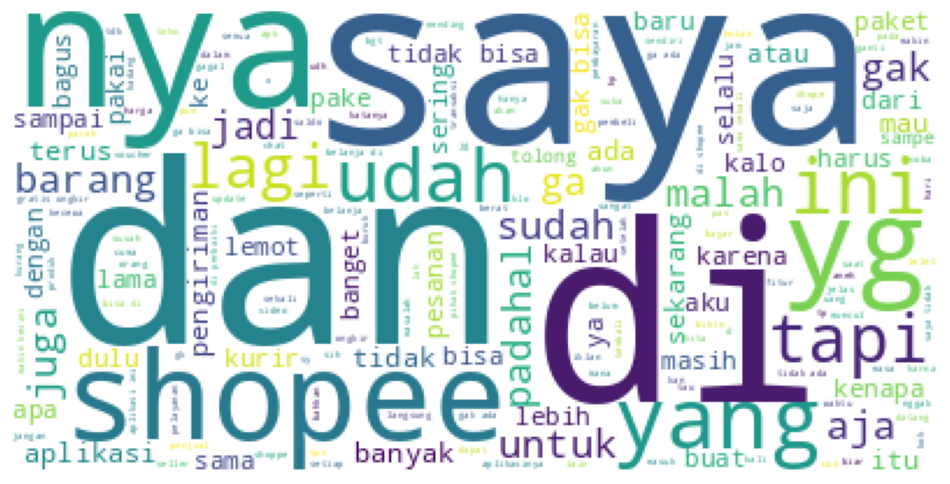

In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='white').generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

## Removing Missing Values

In [12]:
stopwords = ["rb","kak","aja","ad","ga","yg","gk","gak","ini""lagi","yang","di","saya","tapi","nya","dan","shopee","ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhir","akhiri","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","artinya","asal","asalkan","atas","atau","ataukah","ataupun","awal","awalnya","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bagian","bahkan","bahwa","bahwasanya","baik","bakal","bakalan","balik","banyak","bapak","baru","bawah","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","bekerja","belakang","belakangan","belum","belumlah","benar","benarkah","benarlah","berada","berakhir","berakhirlah","berakhirnya","berapa","berapakah","berapalah","berapapun","berarti","berawal","berbagai","berdatangan","beri","berikan","berikut","berikutnya","berjumlah","berkali-kali","berkata","berkehendak","berkeinginan","berkenaan","berlainan","berlalu","berlangsung","berlebihan","bermacam","bermacam-macam","bermaksud","bermula","bersama","bersama-sama","bersiap","bersiap-siap","bertanya","bertanya-tanya","berturut","berturut-turut","bertutur","berujar","berupa","besar","betul","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","bulan","bung","cara","caranya","cukup","cukupkah","cukuplah","cuma","dahulu","dalam","dan","dapat","dari","daripada","datang","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","diakhiri","diakhirinya","dialah","diantara","diantaranya","diberi","diberikan","diberikannya","dibuat","dibuatnya","didapat","didatangkan","digunakan","diibaratkan","diibaratkannya","diingat","diingatkan","diinginkan","dijawab","dijelaskan","dijelaskannya","dikarenakan","dikatakan","dikatakannya","dikerjakan","diketahui","diketahuinya","dikira","dilakukan","dilalui","dilihat","dimaksud","dimaksudkan","dimaksudkannya","dimaksudnya","diminta","dimintai","dimisalkan","dimulai","dimulailah","dimulainya","dimungkinkan","dini","dipastikan","diperbuat","diperbuatnya","dipergunakan","diperkirakan","diperlihatkan","diperlukan","diperlukannya","dipersoalkan","dipertanyakan","dipunyai","diri","dirinya","disampaikan","disebut","disebutkan","disebutkannya","disini","disinilah","ditambahkan","ditandaskan","ditanya","ditanyai","ditanyakan","ditegaskan","ditujukan","ditunjuk","ditunjuki","ditunjukkan","ditunjukkannya","ditunjuknya","dituturkan","dituturkannya","diucapkan","diucapkannya","diungkapkan","dong","dua","dulu","empat","enggak","enggaknya","entah","entahlah","guna","gunakan","hal","hampir","hanya","hanyalah","hari","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ibaratkan","ibaratnya","ibu","ikut","ingat","ingat-ingat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jadi","jadilah","jadinya","jangan","jangankan","janganlah","jauh","jawab","jawaban","jawabnya","jelas","jelaskan","jelaslah","jelasnya","jika","jikalau","juga","jumlah","jumlahnya","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","kasus","kata","katakan","katakanlah","katanya","ke","keadaan","kebetulan","kecil","kedua","keduanya","keinginan","kelamaan","kelihatan","kelihatannya","kelima","keluar","kembali","kemudian","kemungkinan","kemungkinannya","kenapa","kepada","kepadanya","kesampaian","keseluruhan","keseluruhannya","keterlaluan","ketika","khususnya","kini","kinilah","kira","kira-kira","kiranya","kita","kitalah","kok","kurang","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lanjut","lanjutnya","lebih","lewat","lima","luar","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masa","masalah","masalahnya","masih","masihkah","masing","masing-masing","mau","maupun","melainkan","melakukan","melalui","melihat","melihatnya","memang","memastikan","memberi","memberikan","membuat","memerlukan","memihak","meminta","memintakan","memisalkan","memperbuat","mempergunakan","memperkirakan","memperlihatkan","mempersiapkan","mempersoalkan","mempertanyakan","mempunyai","memulai","memungkinkan","menaiki","menambahkan","menandaskan","menanti","menanti-nanti","menantikan","menanya","menanyai","menanyakan","mendapat","mendapatkan","mendatang","mendatangi","mendatangkan","menegaskan","mengakhiri","mengapa","mengatakan","mengatakannya","mengenai","mengerjakan","mengetahui","menggunakan","menghendaki","mengibaratkan","mengibaratkannya","mengingat","mengingatkan","menginginkan","mengira","mengucapkan","mengucapkannya","mengungkapkan","menjadi","menjawab","menjelaskan","menuju","menunjuk","menunjuki","menunjukkan","menunjuknya","menurut","menuturkan","menyampaikan","menyangkut","menyatakan","menyebutkan","menyeluruh","menyiapkan","merasa","mereka","merekalah","merupakan","meski","meskipun","meyakini","meyakinkan","minta","mirip","misal","misalkan","misalnya","mula","mulai","mulailah","mulanya","mungkin","mungkinkah","nah","naik","namun","nanti","nantinya","nyaris","nyatanya","oleh","olehnya","pada","padahal","padanya","pak","paling","panjang","pantas","para","pasti","pastilah","penting","pentingnya","per","percuma","perlu","perlukah","perlunya","pernah","persoalan","pertama","pertama-tama","pertanyaan","pertanyakan","pihak","pihaknya","pukul","pula","pun","punya","rasa","rasanya","rata","rupanya","saat","saatnya","saja","sajalah","saling","sama","sama-sama","sambil","sampai","sampai-sampai","sampaikan","sana","sangat","sangatlah","satu","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebagian","sebaik","sebaik-baiknya","sebaiknya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebesar","sebetulnya","sebisanya","sebuah","sebut","sebutlah","sebutnya","secara","secukupnya","sedang","sedangkan","sedemikian","sedikit","sedikitnya","seenaknya","segala","segalanya","segera","seharusnya","sehingga","seingat","sejak","sejauh","sejenak","sejumlah","sekadar","sekadarnya","sekali","sekali-kali","sekalian","sekaligus","sekalipun","sekarang","sekecil","seketika","sekiranya","sekitar","sekitarnya","sekurang-kurangnya","sekurangnya","sela","selagi","selain","selaku","selalu","selama","selama-lamanya","selamanya","selanjutnya","seluruh","seluruhnya","semacam","semakin","semampu","semampunya","semasa","semasih","semata","semata-mata","semaunya","sementara","semisal","semisalnya","sempat","semua","semuanya","semula","sendiri","sendirian","sendirinya","seolah","seolah-olah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperlunya","seperti","sepertinya","sepihak","sering","seringnya","serta","serupa","sesaat","sesama","sesampai","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","setempat","setengah","seterusnya","setiap","setiba","setibanya","setidak-tidaknya","setidaknya","setinggi","seusai","sewaktu","siap","siapa","siapakah","siapapun","sini","sinilah","soal","soalnya","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tahu","tahun","tak","tambah","tambahnya","tampak","tampaknya","tandas","tandasnya","tanpa","tanya","tanyakan","tanyanya","tapi","tegas","tegasnya","telah","tempat","tengah","tentang","tentu","tentulah","tentunya","tepat","terakhir","terasa","terbanyak","terdahulu","terdapat","terdiri","terhadap","terhadapnya","teringat","teringat-ingat","terjadi","terjadilah","terjadinya","terkira","terlalu","terlebih","terlihat","termasuk","ternyata","tersampaikan","tersebut","tersebutlah","tertentu","tertuju","terus","terutama","tetap","tetapi","tiap","tiba","tiba-tiba","tidak","tidakkah","tidaklah","tiga","tinggi","toh","tunjuk","turut","tutur","tuturnya","ucap","ucapnya","ujar","ujarnya","umum","umumnya","ungkap","ungkapnya","untuk","usah","usai","waduh","wah","wahai","waktu","waktunya","walau","walaupun","wong","yaitu","yakin","yakni","yang"]
len(stopwords)

def remove_stopwords(text):
    # Removing stopwords and text that contains <= 3 letters (usually abbreviations)
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

df["clean"] = df["Reviews"].map(remove_stopwords)
texts=df["clean"]

## WordCloud Visualization (After)

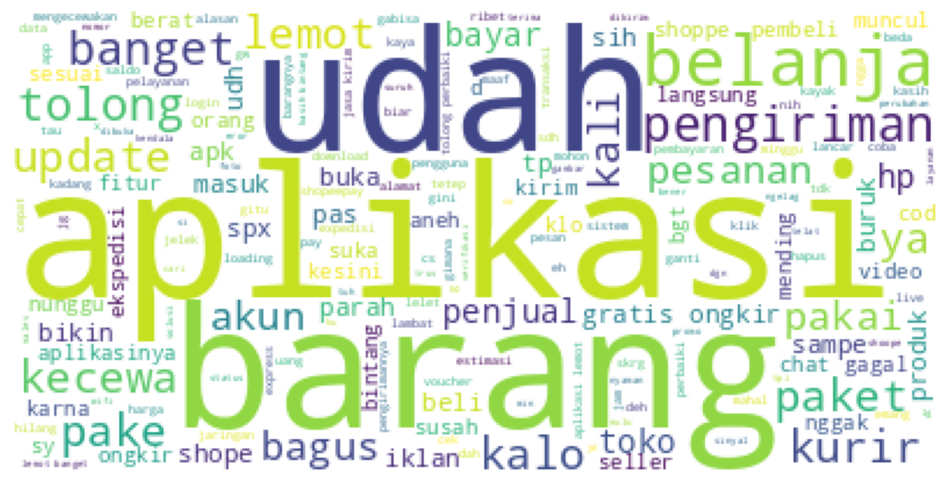

In [13]:
words=""
for x in texts:
  words+="".join(x)+" "
words

from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='white').generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

## Create OCTIS Dataset

In [14]:
# write the two files needed to create an OCTIS dataset
with open("dataset/corpus.tsv", "w+") as f :
    f.write("\n".join(map(str, texts)))
f.close()
words = []
for line in texts :
  words.extend(line.split())

with open("dataset/vocabulary.txt", "w+") as f :
    f.write("\n".join(map(str, words)))
f.close()

# Comparing Models

## LDA (Latent Dirichlet Allocation)

In [15]:
from octis.dataset.dataset import Dataset
from octis.models.LDA import LDA
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

# Load a dataset
dataset = Dataset()
dataset.load_custom_dataset_from_folder("dataset")

lda_td=[]
lda_npmi=[]

for i in tqdm(range(1,11)):
  model = LDA(num_topics=i*2,passes=10,random_state=100)  # Create model
  model_output = model.train_model(dataset) # Train the model
  metric = TopicDiversity(topk=10) # Initialize metric
  topic_diversity_score = metric.score(model_output) # Compute score of the metric
  lda_td.append(topic_diversity_score)
  npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v').score(model_output)
  lda_npmi.append(npmi)

100%|██████████| 10/10 [02:37<00:00, 15.79s/it]


In [16]:
print(lda_td)
print(lda_npmi)

[0.85, 0.725, 0.6666666666666666, 0.5875, 0.5, 0.5, 0.5071428571428571, 0.4625, 0.4444444444444444, 0.405]
[0.43425896807679865, 0.4874072362511366, 0.46565955564935674, 0.4463676090672316, 0.430940934233403, 0.42793523223007646, 0.4040314694632495, 0.40100686156710375, 0.4025616706163883, 0.393047576642385]


## Basic BERTopic (Indonesian + UMAP + HDBSCAN)

In [17]:
from umap import UMAP
class BERTopicModelImpl(AbstractModel) :

  def __init__(self, min_cluster_size=None,
               min_sample_size=None,
               nr_topics=None) :

    super().__init__()
    self.hyperparameters = dict()
    self.hyperparameters['min_cluster_size'] = min_cluster_size
    self.hyperparameters['min_sample_size'] = min_sample_size
    self.BERTopic_model = None
    self.BERTopic_topics = None

    if nr_topics is not None :
      self.init_params = {'nr_topics' : nr_topics}

    umap_model = UMAP(n_neighbors=15, n_components=5,
                  min_dist=0.0, metric='cosine', random_state=100)

    self.init_params['umap_model'] = umap_model
    self.init_params['language'] = 'indonesian'
    self.init_params['verbose'] = True
    self.init_params['top_n_words'] = 10
    self.init_params['n_gram_range'] = (1, 3)

    self.BERTopic_model = BERTopic(**self.init_params)

  def train_model(self, dataset):

    bertdata = [" ".join(words) for words in dataset.get_corpus()]
    self.BERTopic_topics, _ = self.BERTopic_model.fit_transform(bertdata)

    bertopic_topics = [
        [topicwords[0] for topicwords in self.BERTopic_model.get_topic(i)[:10]]
          for i in range(len(set(self.BERTopic_topics)) - 1)]

    result = dict()
    result['topics'] = bertopic_topics
    return result

In [18]:
bt1_td=[]
bt1_npmi=[]

for i in tqdm(range(1,11)):
  bert_base_model = BERTopicModelImpl(nr_topics=i*2)
  results = bert_base_model.train_model(dataset)
  npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v').score(results)
  td = TopicDiversity().score(results)
  bt1_td.append(td)
  bt1_npmi.append(npmi)

  0%|          | 0/10 [00:00<?, ?it/s]2023-12-16 06:59:27,045 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 06:59:41,287 - BERTopic - Embedding - Completed ✓
2023-12-16 06:59:41,289 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 06:59:54,506 - BERTopic - Dimensionality - Completed ✓
2023-12-16 06:59:54,510 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 06:59:54,567 - BERTopic - Cluster - Completed ✓
2023-12-16 06:59:54,569 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 06:59:54,995 - BERTopic - Representation - Completed ✓
2023-12-16 06:59:55,002 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 06:59:55,420 - BERTopic - Topic reduction - Reduced number of topics from 26 to 2
 10%|█         | 1/10 [00:28<04:16, 28.55s/it]2023-12-16 06:59:55,597 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 06:59:59,479 - BERTopic - Embedding - Completed ✓
2023-12-16 06:59:59,481 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:00:06,559 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:00:06,561 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:00:06,619 - BERTopic - Cluster - Completed ✓
2023-12-16 07:00:06,621 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:00:07,575 - BERTopic - Representation - Completed ✓
2023-12-16 07:00:07,578 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:00:07,990 - BERTopic - Topic reduction - Reduced number of topics from 26 to 4
 20%|██        | 2/10 [00:41<02:33, 19.17s/it]2023-12-16 07:00:08,202 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:00:12,021 - BERTopic - Embedding - Completed ✓
2023-12-16 07:00:12,024 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:00:19,071 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:00:19,077 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:00:19,181 - BERTopic - Cluster - Completed ✓
2023-12-16 07:00:19,184 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:00:19,657 - BERTopic - Representation - Completed ✓
2023-12-16 07:00:19,659 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:00:20,110 - BERTopic - Topic reduction - Reduced number of topics from 26 to 6
 30%|███       | 3/10 [00:53<01:51, 15.98s/it]2023-12-16 07:00:20,385 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:00:24,337 - BERTopic - Embedding - Completed ✓
2023-12-16 07:00:24,341 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:00:31,036 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:00:31,042 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:00:31,135 - BERTopic - Cluster - Completed ✓
2023-12-16 07:00:31,137 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:00:31,871 - BERTopic - Representation - Completed ✓
2023-12-16 07:00:31,875 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:00:32,540 - BERTopic - Topic reduction - Reduced number of topics from 26 to 8
 40%|████      | 4/10 [01:05<01:27, 14.59s/it]2023-12-16 07:00:32,837 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:00:36,800 - BERTopic - Embedding - Completed ✓
2023-12-16 07:00:36,801 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:00:43,296 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:00:43,301 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:00:43,399 - BERTopic - Cluster - Completed ✓
2023-12-16 07:00:43,401 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:00:44,137 - BERTopic - Representation - Completed ✓
2023-12-16 07:00:44,143 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:00:44,865 - BERTopic - Topic reduction - Reduced number of topics from 26 to 10
 50%|█████     | 5/10 [01:18<01:09, 13.86s/it]2023-12-16 07:00:45,409 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:00:49,334 - BERTopic - Embedding - Completed ✓
2023-12-16 07:00:49,336 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:00:55,627 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:00:55,630 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:00:55,698 - BERTopic - Cluster - Completed ✓
2023-12-16 07:00:55,700 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:00:56,401 - BERTopic - Representation - Completed ✓
2023-12-16 07:00:56,405 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:00:57,102 - BERTopic - Topic reduction - Reduced number of topics from 26 to 12
 60%|██████    | 6/10 [01:30<00:53, 13.32s/it]2023-12-16 07:00:57,672 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:01:01,968 - BERTopic - Embedding - Completed ✓
2023-12-16 07:01:01,971 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:01:08,268 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:01:08,270 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:01:08,335 - BERTopic - Cluster - Completed ✓
2023-12-16 07:01:08,337 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:01:08,768 - BERTopic - Representation - Completed ✓
2023-12-16 07:01:08,771 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:01:09,480 - BERTopic - Topic reduction - Reduced number of topics from 26 to 14
 70%|███████   | 7/10 [01:43<00:39, 13.02s/it]2023-12-16 07:01:10,092 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:01:14,670 - BERTopic - Embedding - Completed ✓
2023-12-16 07:01:14,673 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:01:21,007 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:01:21,010 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:01:21,065 - BERTopic - Cluster - Completed ✓
2023-12-16 07:01:21,066 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:01:21,483 - BERTopic - Representation - Completed ✓
2023-12-16 07:01:21,486 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:01:21,918 - BERTopic - Topic reduction - Reduced number of topics from 26 to 16
 80%|████████  | 8/10 [01:55<00:25, 12.85s/it]2023-12-16 07:01:22,574 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:01:27,486 - BERTopic - Embedding - Completed ✓
2023-12-16 07:01:27,488 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:01:34,339 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:01:34,340 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:01:34,401 - BERTopic - Cluster - Completed ✓
2023-12-16 07:01:34,403 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:01:34,831 - BERTopic - Representation - Completed ✓
2023-12-16 07:01:34,834 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:01:35,335 - BERTopic - Topic reduction - Reduced number of topics from 26 to 18
 90%|█████████ | 9/10 [02:08<00:13, 13.04s/it]2023-12-16 07:01:36,032 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:01:40,827 - BERTopic - Embedding - Completed ✓
2023-12-16 07:01:40,828 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:01:47,174 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:01:47,176 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:01:47,233 - BERTopic - Cluster - Completed ✓
2023-12-16 07:01:47,234 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:01:47,689 - BERTopic - Representation - Completed ✓
2023-12-16 07:01:47,691 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:01:48,103 - BERTopic - Topic reduction - Reduced number of topics from 26 to 20
100%|██████████| 10/10 [02:21<00:00, 14.17s/it]


In [19]:
print(bt1_td)
print(bt1_npmi)

[1.0, 0.9, 0.88, 0.8714285714285714, 0.8666666666666667, 0.8454545454545455, 0.7923076923076923, 0.7866666666666666, 0.7411764705882353, 0.7315789473684211]
[0.33140788414939, 0.4989838228650916, 0.45144774327096016, 0.5038681253354872, 0.5288140979344452, 0.5261810389816531, 0.5172468475180647, 0.5345281766295179, 0.5355955814229524, 0.519922909652432]


## NMF (Non-Negative Matrix Factorization)

In [20]:
from octis.models.NMF import NMF

# Load a dataset
dataset = Dataset()
dataset.load_custom_dataset_from_folder("dataset")

nmf_td=[]
nmf_npmi=[]

for i in tqdm(range(1,11)):
  model = NMF(num_topics=i*2,passes=10,random_state=100)  # Create model
  model_output = model.train_model(dataset) # Train the model
  metric = TopicDiversity(topk=10) # Initialize metric
  topic_diversity_score = metric.score(model_output) # Compute score of the metric
  nmf_td.append(topic_diversity_score)
  npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v').score(model_output)
  nmf_npmi.append(npmi)

100%|██████████| 10/10 [01:15<00:00,  7.54s/it]


In [21]:
print(nmf_td)
print(nmf_npmi)

[0.95, 0.85, 0.7833333333333333, 0.7625, 0.68, 0.6583333333333333, 0.65, 0.64375, 0.55, 0.54]
[0.4732781419409521, 0.5452198846390689, 0.5067604156886257, 0.5166487244594737, 0.49719490359973734, 0.47436250110133815, 0.49189291022551096, 0.48742266531383005, 0.5017372571155083, 0.4801195276642975]


# Metric Evaluation Comparison

## Topic Diversity

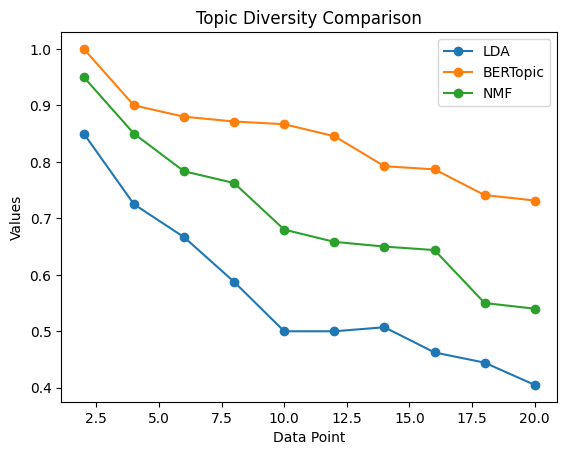

In [22]:
import matplotlib.pyplot as plt

x_values = [2,4,6,8,10,12,14,16,18,20]

plt.plot(x_values, lda_td, label='LDA', marker='o')
plt.plot(x_values, bt1_td, label='BERTopic', marker='o')
plt.plot(x_values, nmf_td, label='NMF', marker='o')

plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Topic Diversity Comparison')
plt.legend()
plt.show()

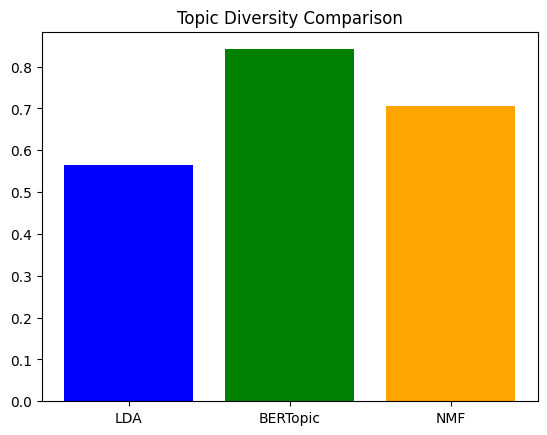

In [23]:
import matplotlib.pyplot as plt

categories = ['LDA', 'BERTopic', 'NMF']
values = [sum(lda_td)/len(lda_td), sum(bt1_td)/len(bt1_td), sum(nmf_td)/len(nmf_td)]

colors = ['blue', 'green', 'orange']
plt.bar(categories, values, color=colors)
plt.title('Topic Diversity Comparison')
plt.show()

## Coherence Score

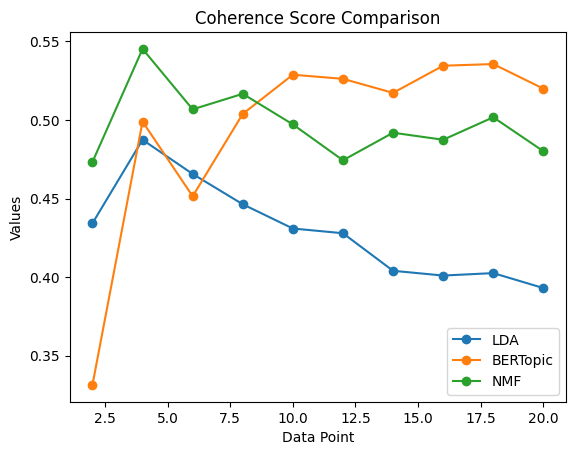

In [24]:
import matplotlib.pyplot as plt

x_values = [2,4,6,8,10,12,14,16,18,20]

plt.plot(x_values, lda_npmi, label='LDA', marker='o')
plt.plot(x_values, bt1_npmi, label='BERTopic', marker='o')
plt.plot(x_values, nmf_npmi, label='NMF', marker='o')

plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Coherence Score Comparison')
plt.legend()
plt.show()

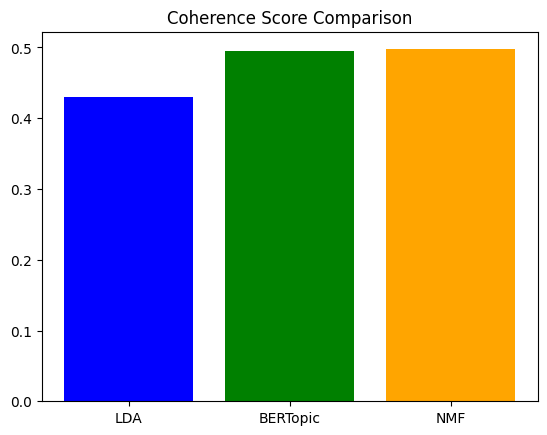

In [25]:
import matplotlib.pyplot as plt

categories = ['LDA', 'BERTopic', 'NMF']
values = [sum(lda_npmi)/len(lda_npmi), sum(bt1_npmi)/len(bt1_npmi), sum(nmf_npmi)/len(nmf_npmi)]

colors = ['blue', 'green', 'orange']
plt.bar(categories, values, color=colors)
plt.title('Coherence Score Comparison')
plt.show()

# Visualization

In [26]:
umap_model = UMAP(n_neighbors=15, n_components=5,
                  min_dist=0.0, metric='cosine', random_state=100)

In [27]:
topic_model = BERTopic(
    language="indonesian",
    top_n_words=10,
    n_gram_range=(1,3),
    nr_topics="auto",
    umap_model=umap_model,
    verbose=True
)
topics, probs = topic_model.fit_transform(texts)

2023-12-16 07:03:05,205 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-12-16 07:03:09,067 - BERTopic - Embedding - Completed ✓
2023-12-16 07:03:09,069 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-16 07:03:16,121 - BERTopic - Dimensionality - Completed ✓
2023-12-16 07:03:16,123 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-16 07:03:16,182 - BERTopic - Cluster - Completed ✓
2023-12-16 07:03:16,184 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-16 07:03:16,628 - BERTopic - Representation - Completed ✓
2023-12-16 07:03:16,630 - BERTopic - Topic reduction - Reducing number of topics
2023-12-16 07:03:17,049 - BERTopic - Topic reduction - Reduced number of topics from 26 to 14


In [28]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,561,-1_aplikasi_barang_udah_banget,"[aplikasi, barang, udah, banget, lemot, belanj...",[tolong baca admin bagus tolong ya kalo akun p...
1,0,494,0_ongkir_barang_belanja_pengiriman,"[ongkir, barang, belanja, pengiriman, gratis, ...",[pas tt shop tutup beli gratis ongkir minimal ...
2,1,114,1_barang_update_apk_bayar,"[barang, update, apk, bayar, udah, kecewa, pak...",[bgt jual barang palsu resmihdc parah pas ngaj...
3,2,109,2_aplikasi_hp_wifi_jaringan,"[aplikasi, hp, wifi, jaringan, lemot, berat, u...",[aplikasi lemot ngereset udah nulis deskripsi ...
4,3,97,3_spx_pengiriman_paket_jasa,"[spx, pengiriman, paket, jasa, expedisi, ekspe...",[tolong tutup layanan pengiriman spx muak laya...
5,4,59,4_login_verifikasi_scan_akun,"[login, verifikasi, scan, akun, wajah, qr, bin...",[byee pindah aplikasi sebelah lupa password po...
6,5,40,5_iklan_iklannya_aplikasi_muncul,"[iklan, iklannya, aplikasi, muncul, mengganggu...",[iklan mulu buka aplikasi apapun iklan males b...
7,6,34,6_cod_sistem_pembayaran cod_banget,"[cod, sistem, pembayaran cod, banget, pembayar...",[parah aps lemot keterangan gratis ongkir pas ...
8,7,26,7_cache_clear_lemot_clear cache,"[cache, clear, lemot, clear cache, update, uda...",[kurangin ah bintang seminggu kali update mulu...
9,8,24,8_update_buka_pas_sinyal,"[update, buka, pas, sinyal, versi, lihat baran...",[min bayar min pdhl sinyal bagus apknya udah u...


In [29]:
topic_model.visualize_barchart()

In [30]:
topic_model.visualize_topics()

In [31]:
topic_model.visualize_hierarchy()

In [32]:
topic_model.visualize_heatmap()

In [33]:
topic_model.visualize_term_rank()

In [34]:
topic_model.get_topic(2)[:10]

[('aplikasi', 0.03956211156904915),
 ('hp', 0.031410505241992695),
 ('wifi', 0.03002902860232151),
 ('jaringan', 0.02903985116729659),
 ('lemot', 0.02837535433142901),
 ('berat', 0.023756622151486457),
 ('update', 0.018473973237104854),
 ('bagus', 0.017354338495462137),
 ('lancar', 0.01550920331642019),
 ('buka', 0.01549996741485813)]